Coordinate descent is optimal for the lasso problem. Here we will compare the convergence rate of Gradient Descent vs Coordinate Descent.

First initialize our problem:

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

np.random.seed(42)
n=200
p=100
X=np.random.normal(0,1,(n,p))
Beta=np.array([1] * 10 + [0] * (p - 10))
epsilon=np.random.normal(0,1,n)
y=X@Beta+epsilon
l=0.01
niter=1000
M=np.linalg.norm(X.T@X,ord=2)
t=1/M


Now we will use CVX to solve the lasso objective, resulting in the optimal $\theta$:

In [265]:
theta = cp.Variable(p)
lasso_objective = cp.Minimize(0.5 * cp.sum_squares(X @ theta - y) + l * cp.norm1(theta))
problem = cp.Problem(lasso_objective)
problem.solve()
theta_hat = theta.value

Run Gradient descent with a fixed step size $t$:

In [266]:
gd_theta = np.zeros(p)
gd_errors = []

for k in range(niter):
    gradient = -X.T @ (y - X @ gd_theta) + l * np.sign(gd_theta)
    gd_theta -= t*gradient
    error = np.linalg.norm(gd_theta - theta_hat)
    gd_errors.append(np.log(error))

Now for the same objective, we will run Coordinate Descent with soft thresholding.

In [267]:
cd_theta = np.zeros(p)
cd_errors = []
for k in range(niter):
    for j in range(p):
        rho = X[:, j].T @ (y - X @ cd_theta + X[:, j] * cd_theta[j])
        if rho < -l:
            cd_theta[j] = (rho + l) / (X[:, j].T @ X[:, j])
        elif rho > l:
            cd_theta[j] = (rho - l) / (X[:, j].T @ X[:, j])
        else:
            cd_theta[j] = 0
    error = np.linalg.norm(cd_theta - theta_hat)
    cd_errors.append(np.log(error))

Below, we plot the results for a single $\lambda$ to compare convergence rates of CD and GD.

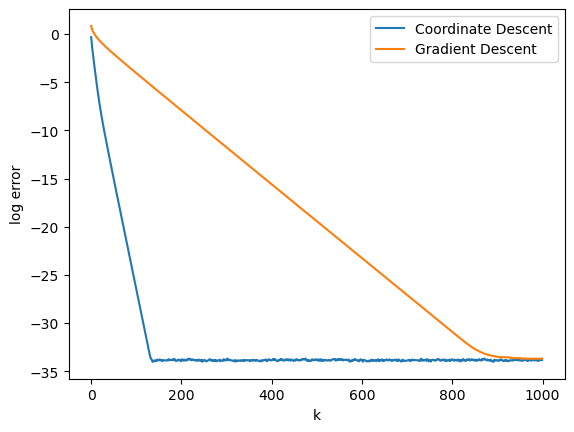

In [268]:
plt.plot(np.arange(niter), cd_errors, label='Coordinate Descent')
plt.plot(np.arange(niter), gd_errors, label='Gradient Descent')
plt.xlabel('k')
plt.ylabel('log error')
plt.legend()
plt.show()

As you can see, the log error for coordinate descent decreases at a faster rate of iterations than gradient descent for the lasso problem. But to futher illustrate the point, we now will compare convergence for multiple values of $\lambda$.

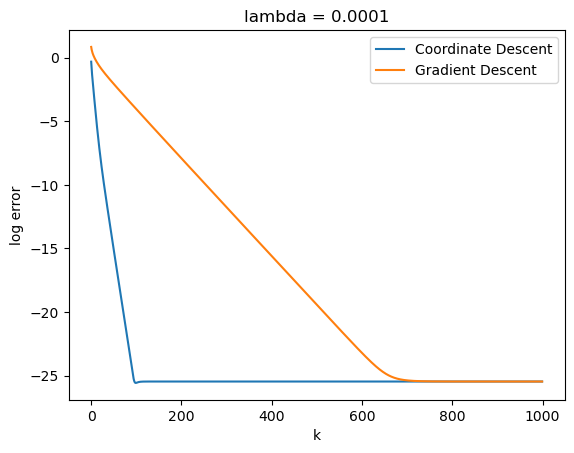

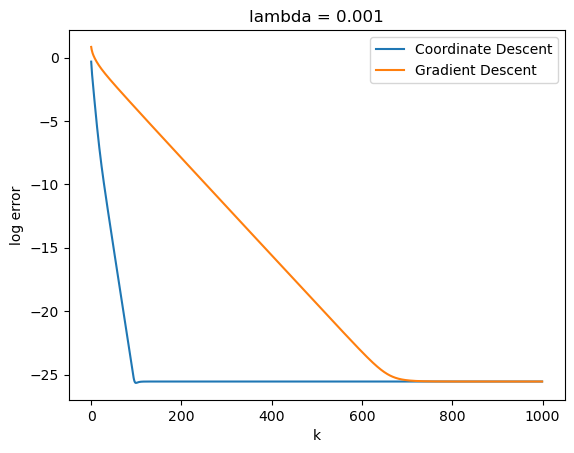

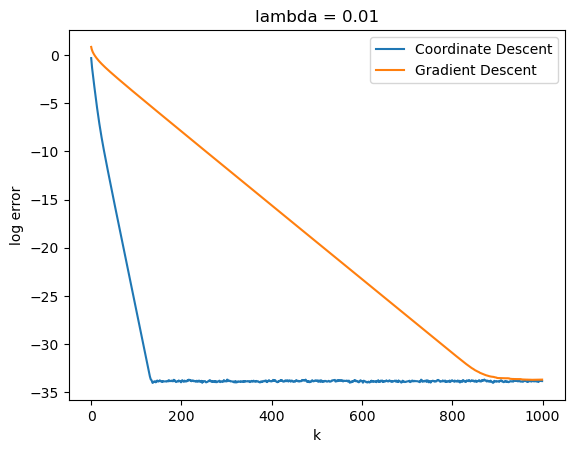

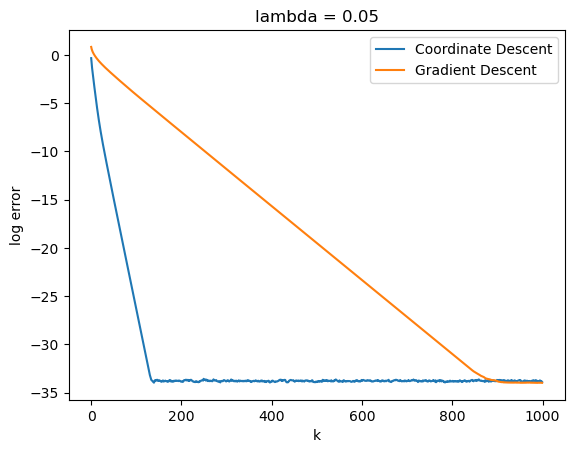

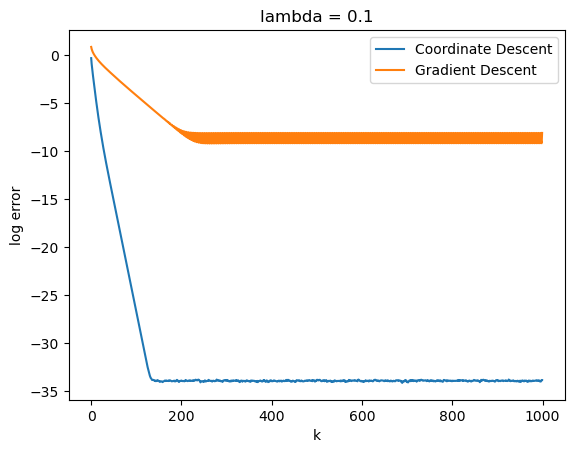

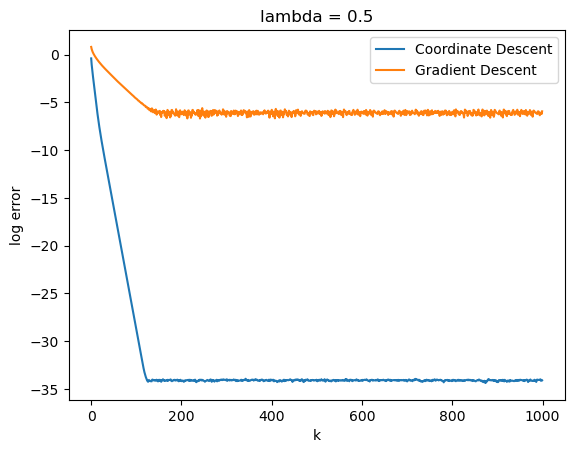

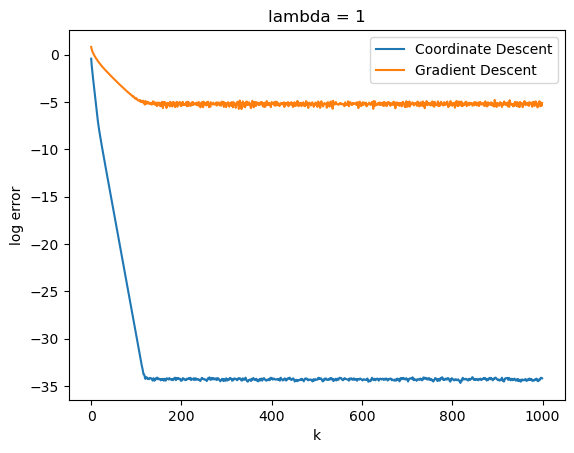

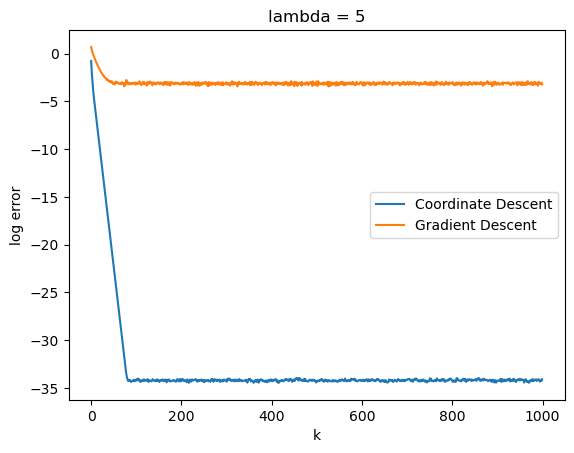

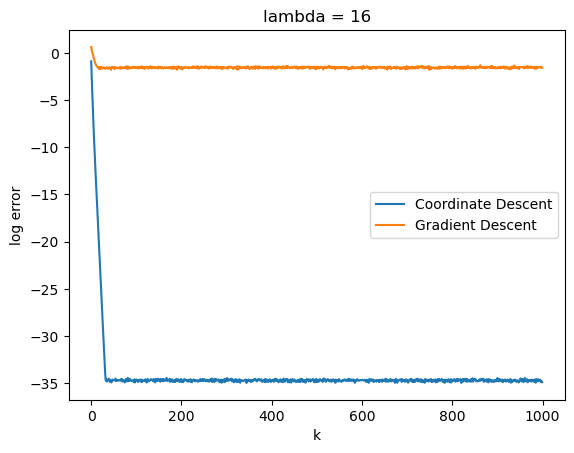

In [269]:


lambdas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 16]
for l in lambdas:
    np.random.seed(42)
    n=200
    p=100
    X=np.random.normal(0,1,(n,p))
    Beta=np.array([1] * 10 + [0] * (p - 10))
    epsilon=np.random.normal(0,1,n)
    y=X@Beta+epsilon
    niter=1000
    M=np.linalg.norm(X.T@X,ord=2)
    t=1/M
    theta = cp.Variable(p)
    lasso_objective = cp.Minimize(0.5 * cp.sum_squares(X @ theta - y) + l * cp.norm1(theta))
    problem = cp.Problem(lasso_objective)
    problem.solve()
    theta_hat = theta.value
    gd_theta = np.zeros(p)
    gd_errors = []

    for k in range(niter):
        gradient = -X.T @ (y - X @ gd_theta) + l * np.sign(gd_theta)
        gd_theta -= t*gradient
        error = np.linalg.norm(gd_theta - theta_hat)
        gd_errors.append(np.log(error))
        
    cd_theta = np.zeros(p)
    cd_errors = []
    for k in range(niter):
        for j in range(p):
            rho = X[:, j].T @ (y - X @ cd_theta + X[:, j] * cd_theta[j])
            if rho < -l:
                cd_theta[j] = (rho + l) / (X[:, j].T @ X[:, j])
            elif rho > l:
                cd_theta[j] = (rho - l) / (X[:, j].T @ X[:, j])
            else:
                cd_theta[j] = 0
        error = np.linalg.norm(cd_theta - theta_hat)
        cd_errors.append(np.log(error))
    plt.figure()
    plt.plot(np.arange(niter), cd_errors, label='Coordinate Descent')
    plt.plot(np.arange(niter), gd_errors, label='Gradient Descent')
    plt.title(f"lambda = {l}")
    plt.xlabel('k')
    plt.ylabel('log error')
    plt.legend()
    plt.show()

As you can see from the plots, coordinate descent outperforms gradient descent for the lasso problem, for all of these lambdas, whether they are very small or very large. furthermore, for large $\lambda$, gradient descent does not converge - the error is too large - but coordinate descent still converges.

Now, repeat the experiment for a random y

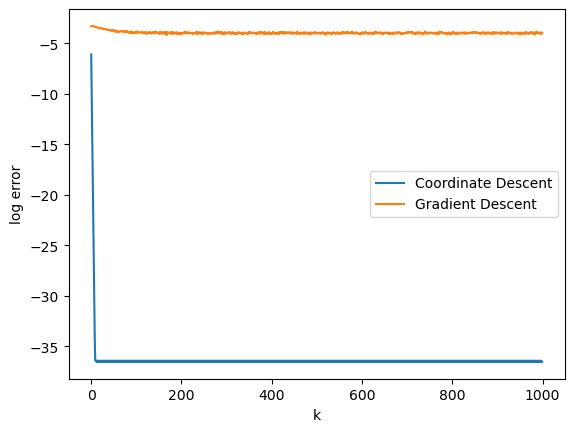

In [270]:
y = np.random.randn(n)

lmbda_max = np.linalg.norm(X.T @ y, ord=np.inf)
l = lmbda_max*0.8

niter = 1000

theta = cp.Variable(p)
lasso_objective = cp.Minimize(0.5 * cp.sum_squares(X @ theta - y) + l * cp.norm1(theta))
problem = cp.Problem(lasso_objective)
problem.solve()
theta_hat = theta.value

gd_theta = np.zeros(p)
gd_errors = []
t = 0.0001

for k in range(niter):
    gradient = -X.T @ (y - X @ gd_theta) + l * np.sign(gd_theta)
    gd_theta -= t*gradient
    error = np.linalg.norm(gd_theta - theta_hat)
    gd_errors.append(np.log(error))

cd_theta = np.zeros(p)
cd_errors = []
for k in range(niter):
    for j in range(p):
        rho = X[:, j].T @ (y - X @ cd_theta + X[:, j] * cd_theta[j])
        if rho < -l:
            cd_theta[j] = (rho + l) / (X[:, j].T @ X[:, j])
        elif rho > l:
            cd_theta[j] = (rho - l) / (X[:, j].T @ X[:, j])
        else:
            cd_theta[j] = 0
    error = np.linalg.norm(cd_theta - theta_hat)
    cd_errors.append(np.log(error))

    
plt.plot(np.arange(niter), cd_errors, label='Coordinate Descent')
plt.plot(np.arange(niter), gd_errors, label='Gradient Descent')
plt.xlabel('k')
plt.ylabel('log error')
plt.legend()
plt.show()